In [37]:
import pandas as pd
star_wars  = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")

In [38]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [39]:
star_wars.columns

Index([u'RespondentID',
       u'Have you seen any of the 6 films in the Star Wars franchise?',
       u'Do you consider yourself to be a fan of the Star Wars film franchise?',
       u'Which of the following Star Wars films have you seen? Please select all that apply.',
       u'Unnamed: 4', u'Unnamed: 5', u'Unnamed: 6', u'Unnamed: 7',
       u'Unnamed: 8',
       u'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14',
       u'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18', u'Unnamed: 19',
       u'Unnamed: 20', u'Unnamed: 21', u'Unnamed: 22', u'Unnamed: 23',
       u'Unnamed: 24', u'Unnamed: 25', u'Unnamed: 26', u'Unnamed: 27',
       u'Unnamed: 28', u'Which character shot first?',
  

In [40]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [41]:
star_wars["RespondentID"].isnull().sum()

0

In [42]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [43]:
yes_no = {"Yes":True,"No":False}

In [44]:
for col in ['Have you seen any of the 6 films in the Star Wars franchise?',
        'Do you consider yourself to be a fan of the Star Wars film franchise?']:
    star_wars[col]= star_wars[col].map(yes_no)
    

In [45]:
print star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
print star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [46]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}


In [47]:
for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(movie_mapping)

In [48]:
for col in star_wars.columns[3:9]:
    print(star_wars[col].value_counts())

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [49]:
star_wars = star_wars.rename(columns = {
       'Which of the following Star Wars films have you seen? Please select all that apply.':"seen_1",
       'Unnamed: 4':"seen_2", 
       'Unnamed: 5':"seen_3", 
       'Unnamed: 6':"seen_4", 
       'Unnamed: 7':"seen_5",
       'Unnamed: 8':"seen_6"})



In [50]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [52]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [53]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Highest/Lowest ranked Star Wars movie:

In [54]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Considering it was suggested that the respondants rank their favorite movies from 1-5 where 1 would be their favorite movie and 5 will be their least favorite movie it seems like ranking_5 or the movie "Star Wars : The Empire Strikes Back" as the best rated so far with it's rating being 2.5 and the movie_3 i.e "Revenge of the sith" was the lowest rated movie here.

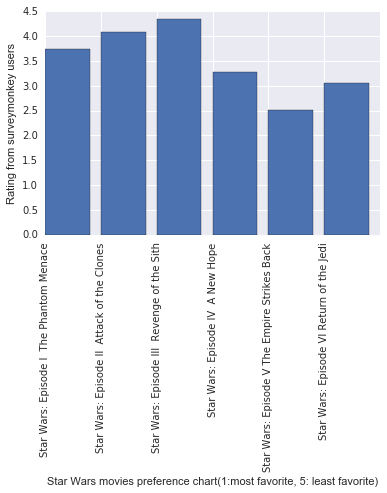

In [64]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

index = ["Star Wars: Episode I  The Phantom Menace",
    "Star Wars: Episode II  Attack of the Clones",
    "Star Wars: Episode III  Revenge of the Sith",
    "Star Wars: Episode IV  A New Hope",
    "Star Wars: Episode V The Empire Strikes Back",
    "Star Wars: Episode VI Return of the Jedi"]

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.xticks(range(6),index,rotation = "vertical")
plt.xlabel("Star Wars movies preference chart(1:most favorite, 5: least favorite)")
plt.ylabel("Rating from surveymonkey users")

Note : The last 3 movies were actually published earlier and are considered as "Original movies" which seems to be rated way higher than the first 3 prequels.

# Most/Least viewed Star Wars movie:

In [63]:
star_wars[star_wars.columns[9:15]].sum()

ranking_1    3117.0
ranking_2    3417.0
ranking_3    3625.0
ranking_4    2736.0
ranking_5    2101.0
ranking_6    2548.0
dtype: float64

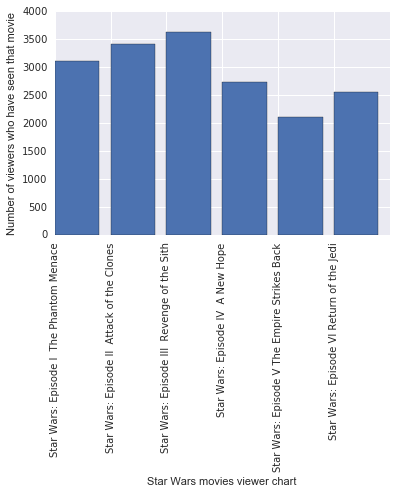

In [70]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].sum())
plt.xticks(range(6),index,rotation = "vertical")
plt.xlabel("Star Wars movies viewer chart")
plt.ylabel("Number of viewers who have seen that movie")

Looks like empire strikes back was seen by the least amount of people here, even if they liked it better. Revenge of the Sith was seen by more people, but was rated as low quality, which probably is a good signal of it's quality. Also, the first three movies were published later, when Star wars already had a fan base, so it's possible that many people who expected better didn't like the prequel realeases.

# Gender based segmentation to see viewer preference:

In [65]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [66]:
males[males.columns[9:15]].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

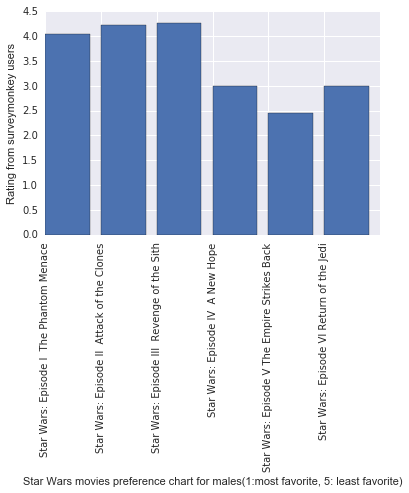

In [68]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.xticks(range(6),index,rotation = "vertical")
plt.xlabel("Star Wars movies preference chart for males(1:most favorite, 5: least favorite)")
plt.ylabel("Rating from surveymonkey users")

In [72]:
females[females.columns[9:15]].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

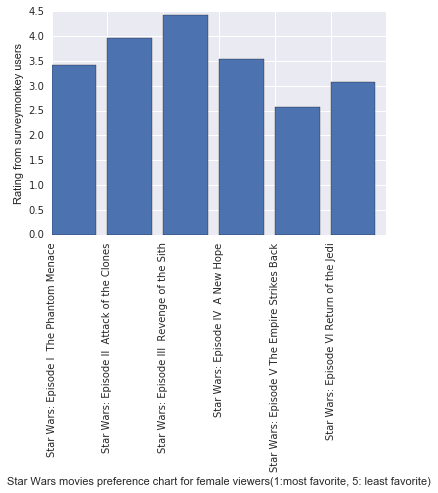

In [71]:
plt.bar(range(6), females[females.columns[9:15]].mean())
plt.xticks(range(6),index,rotation = "vertical")
plt.xlabel("Star Wars movies preference chart for female viewers(1:most favorite, 5: least favorite)")
plt.ylabel("Rating from surveymonkey users")

Empire strikes back was rated as best movie both by male and female viewers, but it does seem like male users hated the prequels more, considering female users seemed to like the first movie of the prequel i.e Phantom Menace. Revenge of the Sith is hated by both male and female viewers, but I thought it was great.

# Star wars movie rating breakdown plot by gender:

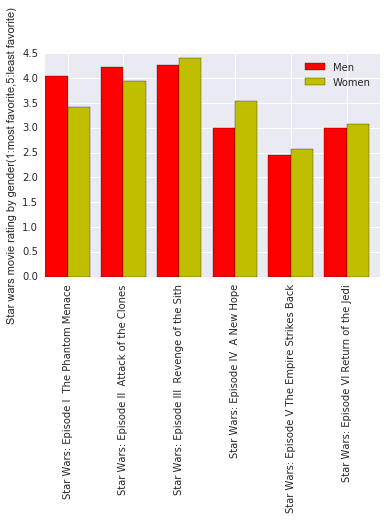

In [86]:
N = 6
menMeans = males[males.columns[9:15]].mean()


ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r')

womenMeans = females[females.columns[9:15]].mean()
rects2 = ax.bar(ind + width, womenMeans, width, color='y')

#add some text for labels, title and axes ticks
ax.set_ylabel('Star wars movie rating by gender(1:most favorite,5:least favorite)')
ax.set_xticks(ind + width)
ax.set_xticklabels(index, rotation = "vertical")

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))






plt.show()

# Star wars viewer count breakdown plot by gender:

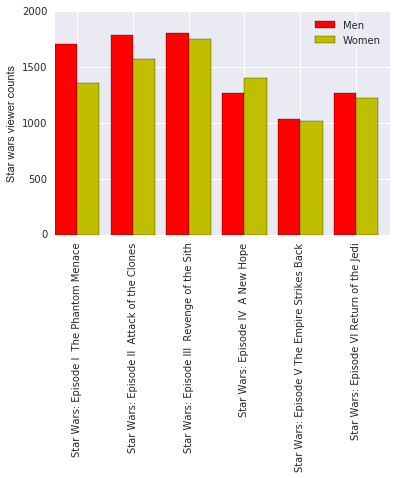

In [88]:
N = 6
menMeans = males[males.columns[9:15]].sum()


ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r')

womenMeans = females[females.columns[9:15]].sum()
rects2 = ax.bar(ind + width, womenMeans, width, color='y')

#add some text for labels, title and axes ticks
ax.set_ylabel('Star wars viewer counts')
ax.set_xticks(ind + width)
ax.set_xticklabels(index, rotation = "vertical")

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))





plt.show()